# Assignment 3: Intelligent Cancer Diagnose
## Important Time
Submission: 23:59 Apr. 11, 2024 (UTC+8)
## Related Datasets
Assignment3-Breast-Cancer-Diagnose.csv
## Task Description
According to features computed from a digitized image of a fine needle aspirate (FNA) of a breast
mass, choose appropriate classifier to diagnose whether breast tissues are malignant or benign.
## What You Need to Program
1. Split your datasets into train/val/test or train/test.
2. Implement at least 3 types of classifiers to make the binary classification.
3. Give the process about how you choose the hyperparameters for each classifier.
4. Compare the performance of difference classifiers.
## Note
1. This work can be done using scikit-learn.
2. Using the provided ".csv" file. Do not directly load your data using the scikit-learn API, i.e.,
"sklearn.datasets.load_breast_cancer ".


## Importing libraries

### Data

In [373]:
import pandas as pd

### Preprocessing 

In [374]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Models

In [375]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reading data

In [376]:
df = pd.read_csv('Assignment3-Breast-Cancer-Diagnose.csv')
# Drop unnecessary columns (in dataset we only one absolutely null column)
df.dropna(axis=1, inplace=True)

### Checking number of rows and columns

In [377]:
row_count = df.shape[0]
column_count = df.shape[1]
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')

The DataFrame has 569 rows.
The DataFrame has 32 columns.


### Checking instances of each class

In [378]:
malignant_count = (df["diagnosis"] == "M").sum()
benign_count = (df["diagnosis"] == "B").sum()
print(f'Number of malignant occurrences: {malignant_count}, {malignant_count/row_count*100} %')
print(f'Number of benign occurrences: {benign_count}, {benign_count/row_count*100} %')

Number of malignant occurrences: 212, 37.258347978910365 %
Number of benign occurrences: 357, 62.741652021089635 %


### We can assume that data is balanced because we have enough instances in each class (we do not need to do another improvements to balance our data)

In [379]:
# Removing useless id column
df = df.drop(['id'], axis = 1)

# Change chars to numbers
mapping = {'M': 1, 'B': 0}
# Use map function to replace values
df['diagnosis'] = df['diagnosis'].map(mapping)

# Setting data and target
x = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

# Normalizing data

In [380]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Splitting data to train and test sets

In [381]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
print("Train 80%\nTest 20%")

Train 80%
Test 20%


# Define parameter grids for each model

Grid Search - iterating hyperparameters

I am going to use Support Vector Classifier (SVC), Random Forest (rf) and K Near Neighbours models

### C controls the trade-off between smooth decision boundaries and classifying training points correctly, while gamma defines the influence of training samples on the decision boundary. Kernel - kernel type

In [382]:
svc_param_grid = {'C': [1, 10, 20, 30], 'gamma': [0.05, 0.1, 0.2, 0.3], 'kernel': ['linear', 'rbf']}

### The parameter grid contains different values for n_estimators (number of trees in the forest) and max_depth (maximum depth of the trees). n_estimators controls the number of trees in the forest, while max_depth limits the depth of each tree to prevent overfitting.

In [383]:
rf_param_grid = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20]}

### The parameter grid contains various values for n_neighbors (number of neighbors to consider) and weights (weighting scheme for prediction). n_neighbors determines the number of nearest neighbors to consider for classification, while weights specifies the weight function used in prediction.

In [384]:
knn_param_grid = {'n_neighbors': [7, 9, 11, 13], 'weights': ['uniform', 'distance']}

# Initialize models

In [385]:
svc = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

# Initialize GridSearchCV for each model

I am using cross validation for every model (splitting by 3 parts)

In [386]:
svc_grid_search = GridSearchCV(svc, svc_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit models with grid search

In [387]:
svc_grid_search.fit(x_train, y_train)
rf_grid_search.fit(x_train, y_train)
knn_grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

# Get the best parameters and accuracies

In [388]:
best_svc = svc_grid_search.best_estimator_
svc_best_params = svc_grid_search.best_params_
svc_best_accuracy = svc_grid_search.best_score_

In [389]:
best_rf = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_
rf_best_accuracy = rf_grid_search.best_score_

In [390]:
best_knn = knn_grid_search.best_estimator_
knn_best_params = knn_grid_search.best_params_
knn_best_accuracy = knn_grid_search.best_score_

# Calculate testing accuracies

In [391]:
svc_test_accuracy = best_svc.score(x_test, y_test)
rf_test_accuracy = best_rf.score(x_test, y_test)
knn_test_accuracy = best_knn.score(x_test, y_test)

# Print results

In [392]:
print("Support Vector Classifier:")
print("Best parameters:", svc_best_params)
print("Best accuracy:", svc_best_accuracy)
print("Testing accuracy:", svc_test_accuracy)

print("\nRandom Forest:")
print("Best parameters:", rf_best_params)
print("Best accuracy:", rf_best_accuracy)
print("Testing accuracy:", rf_test_accuracy)

print("\nK-Nearest Neighbors:")
print("Best parameters:", knn_best_params)
print("Best accuracy:", knn_best_accuracy)
print("Testing accuracy:", knn_test_accuracy)

Support Vector Classifier:
Best parameters: {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}
Best accuracy: 0.9692546764261648
Testing accuracy: 0.9736842105263158

Random Forest:
Best parameters: {'max_depth': 20, 'n_estimators': 100}
Best accuracy: 0.9582752410828396
Testing accuracy: 0.9473684210526315

K-Nearest Neighbors:
Best parameters: {'n_neighbors': 11, 'weights': 'distance'}
Best accuracy: 0.9670762170326479
Testing accuracy: 0.956140350877193


### Predict labels for the testing set

In [393]:
svc_test_predict = best_svc.predict(x_test)
rf_test_predict = best_rf.predict(x_test)
knn_test_predict = best_knn.predict(x_test)

### Compute confusion matrices

In [394]:
svc_conf_matrix = confusion_matrix(y_test, svc_test_predict)
rf_conf_matrix = confusion_matrix(y_test, rf_test_predict)
knn_conf_matrix = confusion_matrix(y_test, knn_test_predict)

# Extract different types of errors from confusion matrices

In [395]:
svc_false_positives = svc_conf_matrix[0, 1]
svc_false_negatives = svc_conf_matrix[1, 0]
rf_false_positives = rf_conf_matrix[0, 1]
rf_false_negatives = rf_conf_matrix[1, 0]
knn_false_positives = knn_conf_matrix[0, 1]
knn_false_negatives = knn_conf_matrix[1, 0]

# Print confusion matrices and errors

Support Vector Classifier False Positives: 0
Support Vector Classifier False Negatives: 3
Random Forest False Positives: 1
Random Forest False Negatives: 5
K-Nearest Neighbors False Positives: 0
K-Nearest Neighbors False Negatives: 5


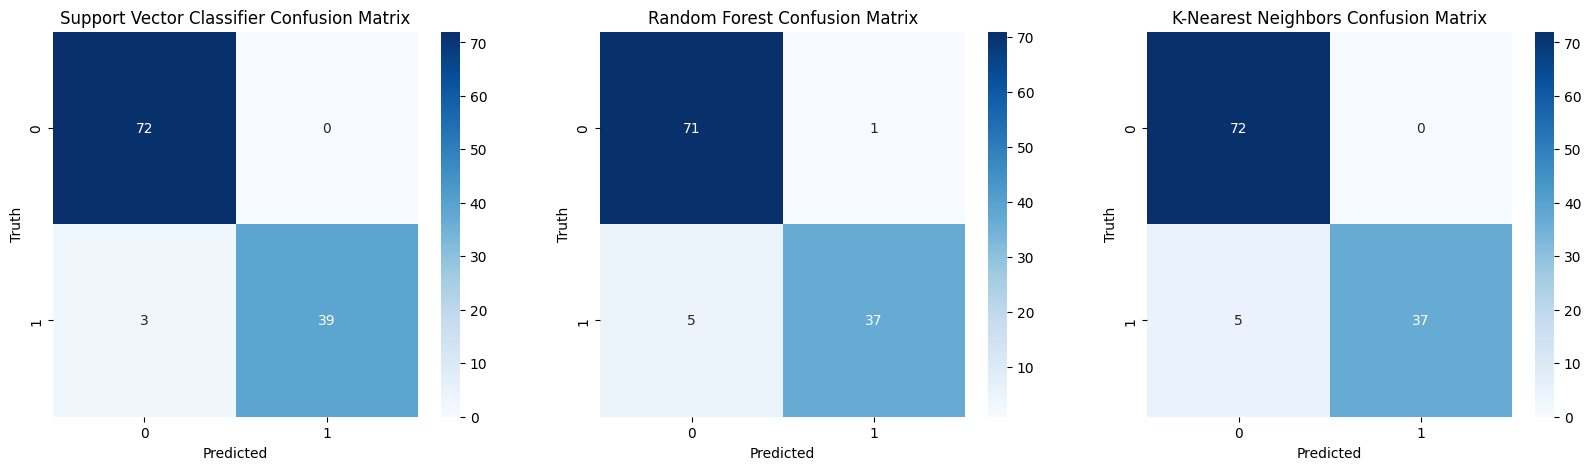

In [396]:
# Create subplots for all three confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot Support Vector Classifier Confusion Matrix
sns.heatmap(svc_conf_matrix, annot=True, ax=axes[0], cmap="Blues")
axes[0].set_title("Support Vector Classifier Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Truth")

# Plot Random Forest Confusion Matrix
sns.heatmap(rf_conf_matrix, annot=True, ax=axes[1], cmap="Blues")
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Truth")

# Plot K-Nearest Neighbors Confusion Matrix
sns.heatmap(knn_conf_matrix, annot=True, ax=axes[2], cmap="Blues")
axes[2].set_title("K-Nearest Neighbors Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Truth")

print("Support Vector Classifier False Positives:", svc_false_positives)
print("Support Vector Classifier False Negatives:", svc_false_negatives)

print("Random Forest False Positives:", rf_false_positives)
print("Random Forest False Negatives:", rf_false_negatives)

print("K-Nearest Neighbors False Positives:", knn_false_positives)
print("K-Nearest Neighbors False Negatives:", knn_false_negatives)

1. False Positive: Occurs when the model incorrectly predicts a positive outcome when the actual outcome is negative.
2. False Negative: Occurs when the model incorrectly predicts a negative outcome when the actual outcome is positive. False negatives may result in missed opportunities or failures to act when action is needed. In certain situations, such as medical diagnosis or security screening as there, false negatives can have serious consequences if they lead to undetected issues or risks.

That means that we need to choose model with minimal false negative predictions

## Support Vector Classifier (SVC):

1. Linearly Separable Data: SVC works well when the data is linearly separable, meaning classes can be separated by a straight line or hyperplane.
2. Small to Medium-sized Datasets: SVC can handle small to medium-sized datasets efficiently, especially when the number of features is not too large.

## Random Forest:

1. High-dimensional Data: Random Forest performs well with high-dimensional data, where the number of features is large relative to the number of samples.
2. Nonlinear Relationships: Random Forest can capture complex nonlinear relationships between features and the target variable.
3. Robustness to Overfitting: Random Forest tends to generalize well and is less prone to overfitting compared to decision trees, especially when the max_depth parameter is appropriately tuned.
4. Imbalanced data: Random Forest can handle imbalanced data reasonably well 

## K-Nearest Neighbors (KNN):

1. Localized Patterns: KNN is effective for capturing localized patterns in the data, where nearby instances tend to have similar target values.
2. No Assumptions about Data Distribution: Unlike parametric models, KNN does not assume any specific form of the data distribution, making it suitable for diverse datasets.

## Conclusion

This dataset is well-balanced, has an optimal number of parameters, so any machine learning algorithm can solve the classification problem well, this can also be seen thanks to the testing sample

It is better to choose SVC since it has less False Negative predictions than others.

# Get numerical the importance of characteristics

Such a graph is possible due to the high interpretability of the random forest

Variable: concave points_worst Importance: 0.15
Variable: perimeter_worst      Importance: 0.12
Variable: area_worst           Importance: 0.12
Variable: radius_worst         Importance: 0.08
Variable: concavity_mean       Importance: 0.07
Variable: concave points_mean  Importance: 0.07
Variable: perimeter_mean       Importance: 0.06
Variable: area_se              Importance: 0.06
Variable: concavity_worst      Importance: 0.05
Variable: radius_mean          Importance: 0.04
Variable: area_mean            Importance: 0.03
Variable: texture_mean         Importance: 0.02
Variable: compactness_mean     Importance: 0.02
Variable: texture_worst        Importance: 0.02
Variable: radius_se            Importance: 0.01
Variable: perimeter_se         Importance: 0.01
Variable: compactness_se       Importance: 0.01
Variable: concavity_se         Importance: 0.01
Variable: concave points_se    Importance: 0.01
Variable: smoothness_worst     Importance: 0.01
Variable: compactness_worst    Importanc

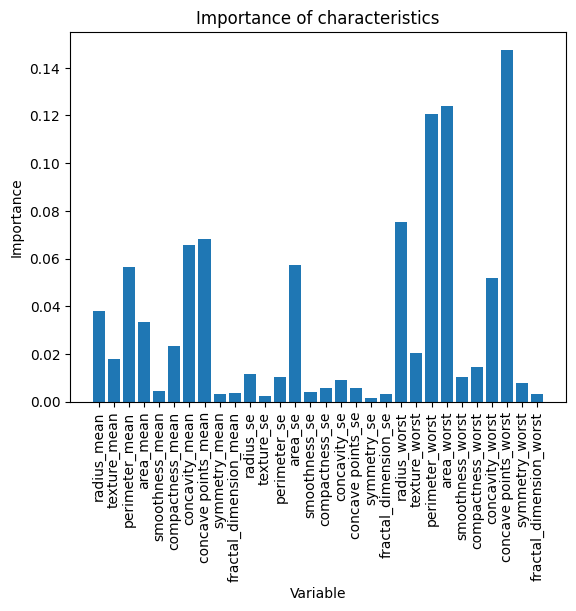

In [397]:
importance_of_char = best_rf.feature_importances_

# Get the name of the features
feature_list = list(df.columns.drop("diagnosis"))

# List of tuples with variable and importance
feature_importance= [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importance_of_char)]

# Sort the feature the importance of characteristics by most important first
feature_importance = sorted(feature_importance, key = lambda x_sort: x_sort[1], reverse = True)

# Print out the feature and the importance of characteristics 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

# list of x locations for plotting
x_values = list(range(len(importance_of_char)))

# Make a bar chart
plt.bar(x_values, importance_of_char, orientation ='vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Importance of characteristics');

This graph shows that the most important variables are related to the perimeter, area and radius of the tumor in the worst case (this is probably how it stands for) Also concave points are very important.